In [ ]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
# Unduh dataset dari Kaggle
path = kagglehub.dataset_download("pratikgarai/mobile-phone-specifications-and-prices")
print("Path to dataset files:", path)

# Baca data CSV (ganti sesuai nama file dalam folder)
data_path = path + "/ndtv_data_final.csv"  # sesuaikan dengan nama file CSV yang ada
df = pd.read_csv(data_path)

Path to dataset files: /kaggle/input/mobile-phone-specifications-and-prices


In [ ]:
# Tampilkan 5 baris pertama
print("Data awal:")
print(df.head())

# Cek informasi kolom
print("\nInformasi dataset:")
print(df.info())

Data awal:
   Unnamed: 0                            Name    Brand  \
0           0  OnePlus 7T Pro McLaren Edition  OnePlus   
1           1                   Realme X2 Pro   Realme   
2           2               iPhone 11 Pro Max    Apple   
3           3                       iPhone 11    Apple   
4           4                    LG G8X ThinQ       LG   

                    Model  Battery capacity (mAh)  Screen size (inches)  \
0  7T Pro McLaren Edition                    4085                  6.67   
1                  X2 Pro                    4000                  6.50   
2       iPhone 11 Pro Max                    3969                  6.50   
3               iPhone 11                    3110                  6.10   
4               G8X ThinQ                    4000                  6.40   

  Touchscreen  Resolution x  Resolution y  Processor  ...  Rear camera  \
0         Yes          1440          3120          8  ...         48.0   
1         Yes          1080          2400

In [ ]:
# Drop kolom yang tidak relevan (opsional)
if 'Phone Name' in df.columns:
    df = df.drop(columns=['Phone Name'])

# Handle missing values
df = df.dropna()  # Atau bisa juga df.fillna(method='ffill') tergantung konteks

# Encode kolom kategorikal menjadi numerik
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [ ]:
dir(column)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'stri

In [ ]:
# Definisikan fitur dan target (asumsikan kita ingin memprediksi 'Price')
x = df.drop(columns=['Price'])  # fitur
y = df['4G/ LTE']  # target

In [ ]:
x

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Internal storage (GB),Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE
0,0,842,44,49,4085,6.67,1,1440,3120,8,...,256.000,48.0,16.0,0,1,1,1,2,1,1
1,1,959,53,1142,4000,6.50,1,1080,2400,8,...,64.000,64.0,16.0,0,1,1,1,2,1,1
2,2,1341,3,1288,3969,6.50,1,1242,2688,6,...,64.000,12.0,12.0,6,1,1,1,2,1,1
3,3,1339,3,1286,3110,6.10,1,828,1792,6,...,64.000,12.0,12.0,6,1,1,1,2,1,1
4,4,481,29,522,4000,6.40,1,1080,2340,8,...,128.000,12.0,32.0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1354,299,23,148,1500,4.00,1,480,800,4,...,8.000,5.0,0.3,0,1,1,1,2,1,0
1355,1355,1155,63,652,2000,5.00,1,480,854,4,...,8.000,8.0,5.0,0,1,1,1,2,1,0
1356,1356,375,23,224,1700,4.50,1,480,854,2,...,4.000,5.0,2.0,0,1,1,0,2,1,0
1357,1357,1336,73,140,1250,4.00,1,480,800,1,...,0.512,2.0,0.3,0,1,1,1,2,1,0


In [ ]:
y

,4G/ LTE
0,1
1,1
2,1
3,1
4,0
...,...
1354,0
1355,0
1356,0
1357,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
accuracy = dtree.score(x_test, y_test)
print(f"Akurasi model: {accuracy*100:.2f}%")

Akurasi model: 100.00%


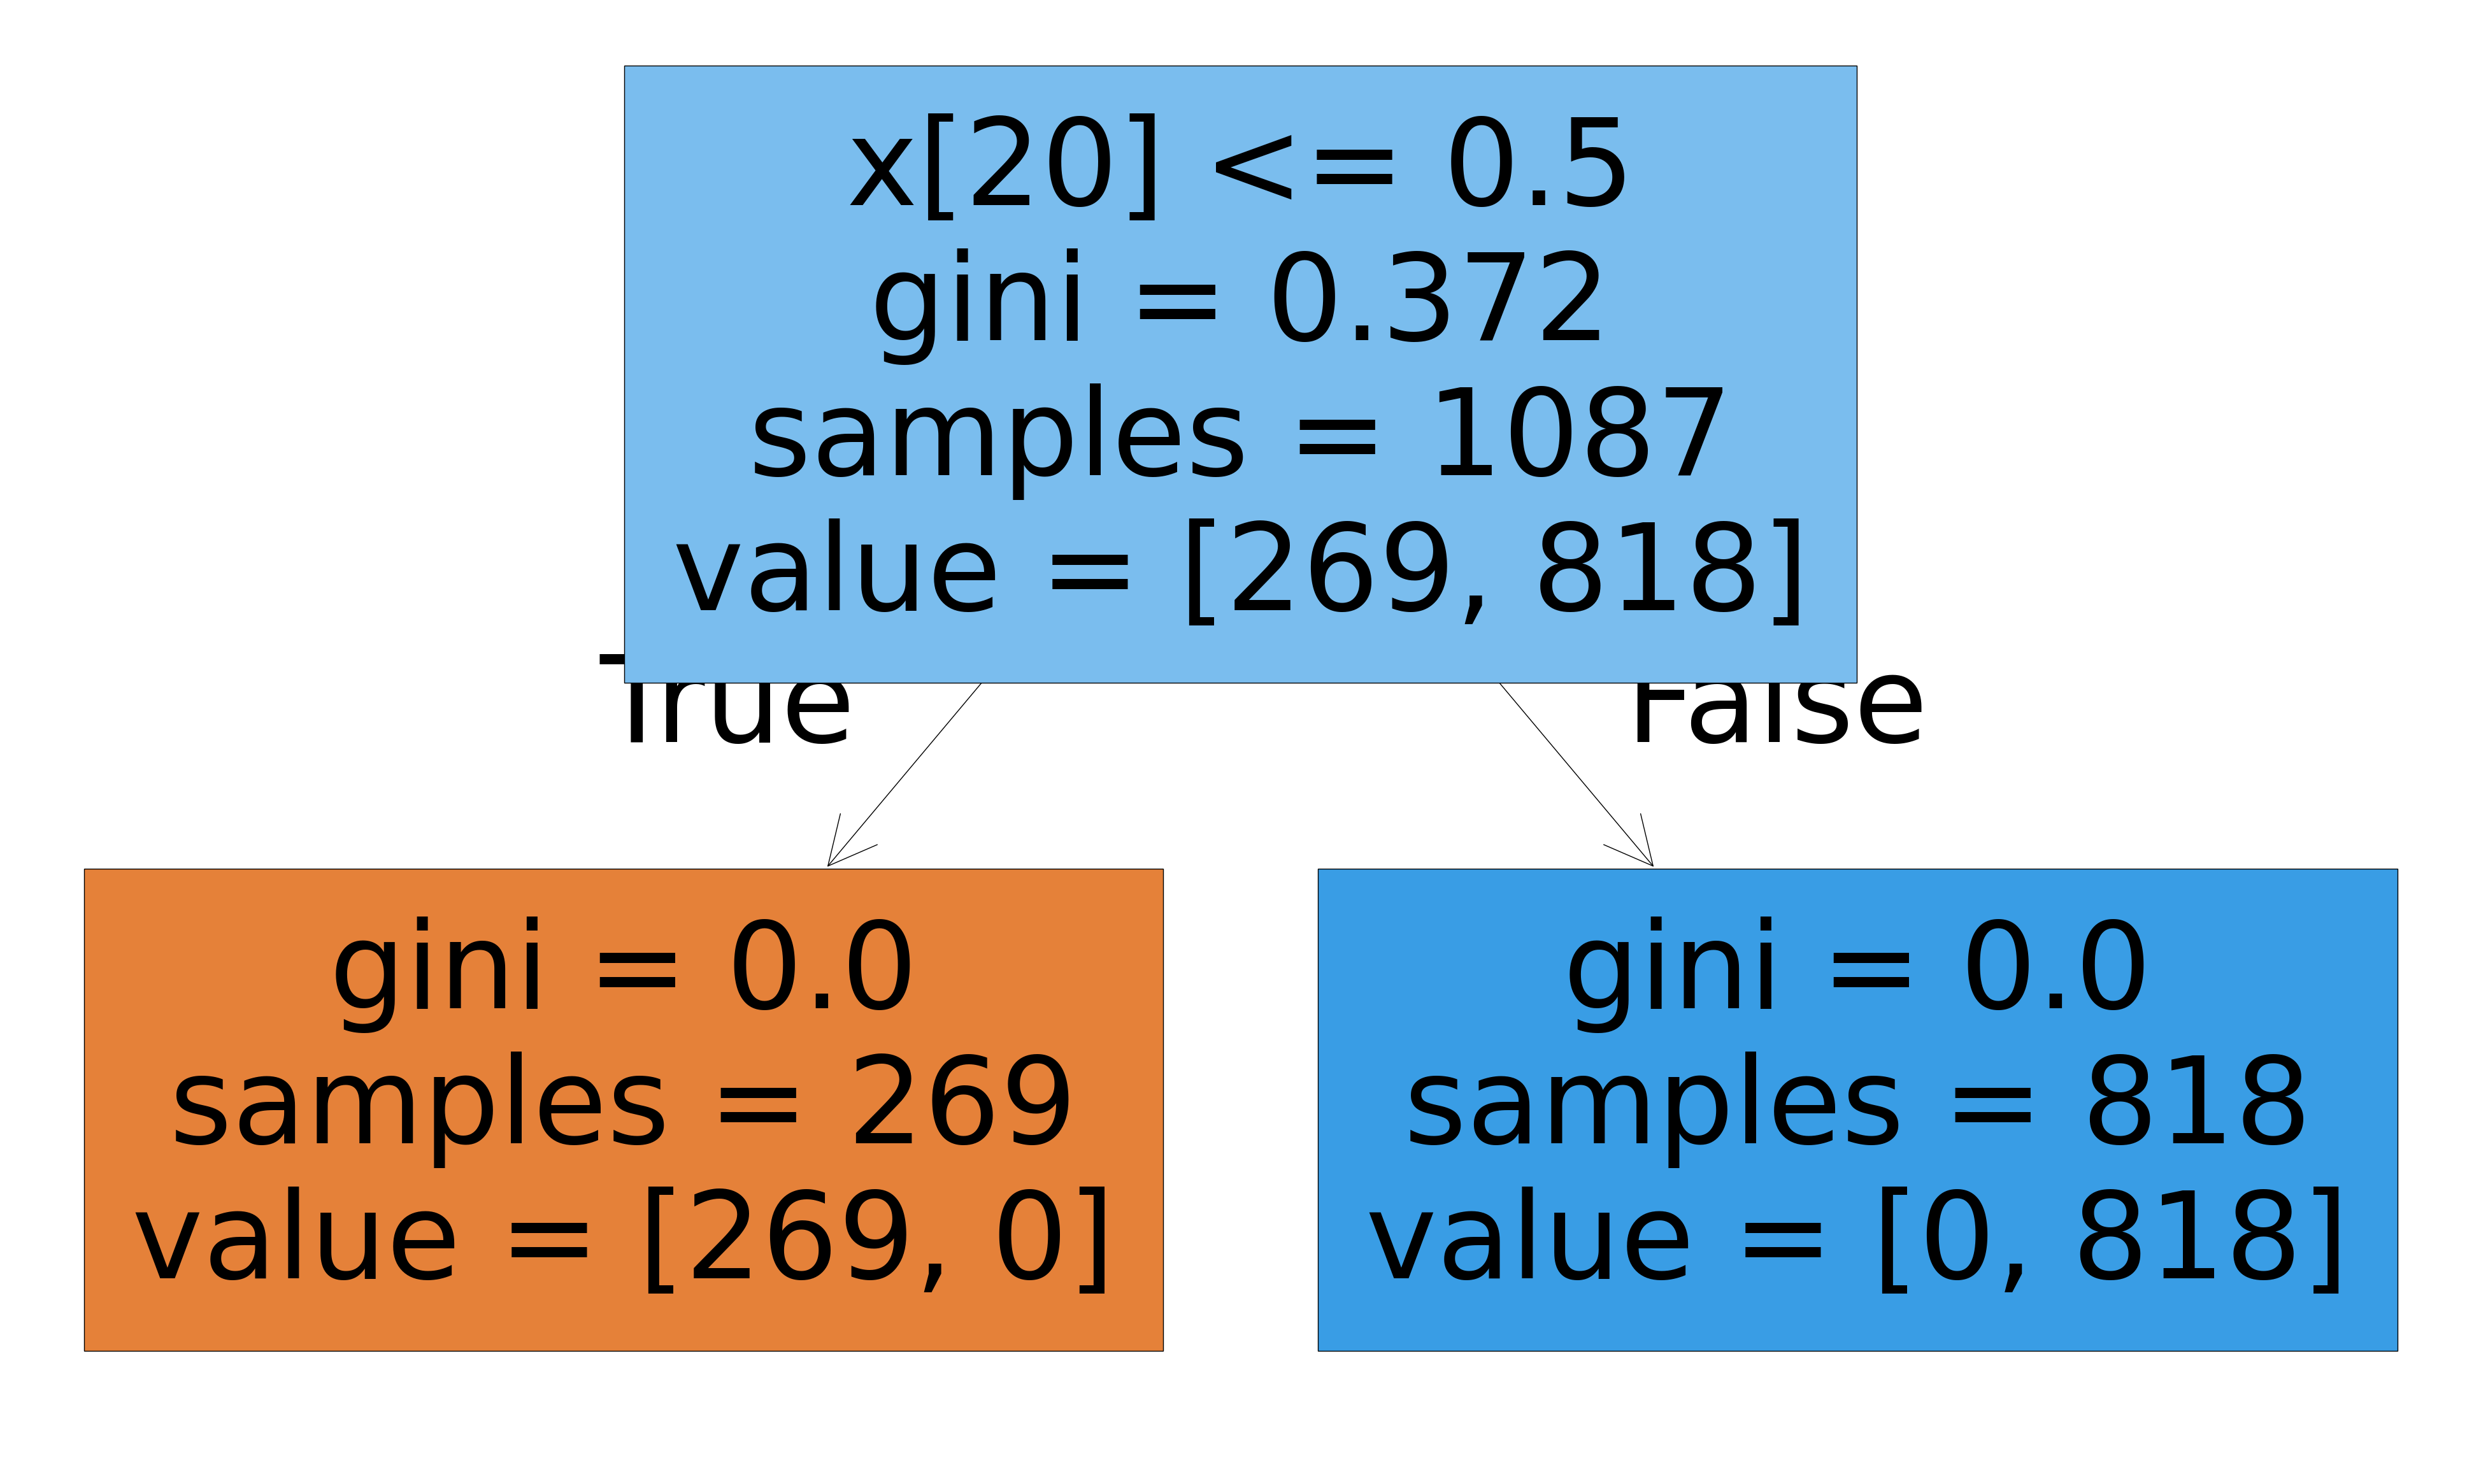

In [ ]:
plt.figure(figsize=(50, 30))
tree.plot_tree(dtree, filled=True)
plt.show()